In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_DFA import *
from jove.Def_NFA import *
from jove.Def_RE2NFA import *
from jove.Def_NFA2RE import *
from jove.Def_md2mc import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Cloning into 'Jove'...
remote: Enumerating objects: 4855, done.
remote: Counting objects: 100% (221/221), done.
remote: Compressing objects: 100% (154/154), done.
remote: Total 4855 (delta 132), reused 145 (delta 62), pack-reused 4634
Receiving objects: 100% (4855/4855), 7.55 MiB | 18.72 MiB/s, done.
Resolving deltas: 100% (3137/3137), done.
You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR)
help(state_combos)
help(sepFinNonFin)
help(bash_eql_classes)
help(listminus)
help(bash_1)
help(mk_rep_eqc)
help(F_of)
help(rep_of_s)
help(q0_of)
help(Delta_of)
help(mk_state_eqc_name)

You may use any of these help commands:
help(mk_nfa)
help(

# (1) Draw this NFA out

In [ ]:
nfa1 = md2mc('''
NFA

IF : '' | a -> A

A  : '' | b -> B

B  : ''     -> C

C  : '' | a -> IF

C  : a | c  -> D

D  : a      -> F

''')

Generating LALR tables


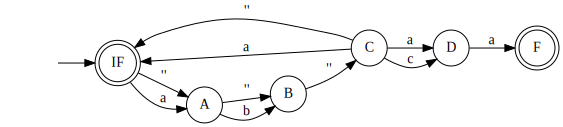

In [ ]:
dotObj_nfa(nfa1)

# (2) What is the Delta value for C upon a, b, c, '' ?

In [ ]:
nfa1

{'Delta': {('A', ''): {'B'},
  ('A', 'b'): {'B'},
  ('B', ''): {'C'},
  ('C', ''): {'IF'},
  ('C', 'a'): {'D', 'IF'},
  ('C', 'c'): {'D'},
  ('D', 'a'): {'F'},
  ('IF', ''): {'A'},
  ('IF', 'a'): {'A'}},
 'F': {'F', 'IF'},
 'Q': {'A', 'B', 'C', 'D', 'F', 'IF'},
 'Q0': {'IF'},
 'Sigma': {'a', 'b', 'c'}}

## It is this

$ \delta(C, a) = \{ D, IF \}$

$ \delta(C, b) =  \{ \}$

$ \delta(C, c) = \{ D \}$

$ \delta(C, \varepsilon) = \{ IF \} $

# Questions on NFA2DFA

# (3) Compute the Eclosure of IF

In [ ]:
help(Eclosure)

Help on function Eclosure in module jove.Def_NFA:

Eclosure(N, S)
    In : N (consistent NFA)
         S (set of states of NFA to be Eclosed)
    Out: Eclosure of S (set of states).



In [ ]:
Eclosure(nfa1, {'IF'})

{'A', 'B', 'C', 'IF'}

# (4) Compute NFA 2 DFA of nfa1

In [ ]:
help(nfa2dfa)

Help on function nfa2dfa in module jove.Def_NFA:

nfa2dfa(N, STATENAME_MAXSIZE=20)
    In : N (consistent NFA), and optional STATENAME_MAXSIZE
         for the generated DFA states
    Out: A consistent DFA that is language-equivalent to N.



In [ ]:
dfa1 = nfa2dfa(nfa1, STATENAME_MAXSIZE = 40)

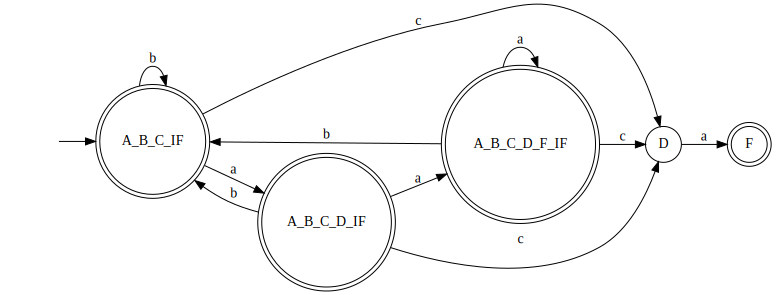

In [ ]:
dotObj_dfa(dfa1, STATENAME_MAXSIZE = 40)

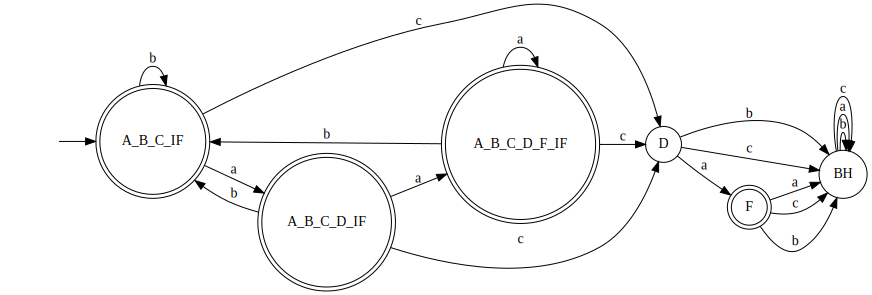

In [ ]:
dotObj_dfa_w_bh(dfa1, STATENAME_MAXSIZE = 40)

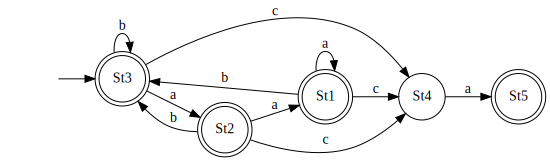

In [ ]:
dotObj_dfa(dfa1, STATENAME_MAXSIZE = 10)

# Questions on RE

## (5) What is the language denoted by this RE?

In [ ]:
RE1 = "b(a+ab+b*)"

# (6) What is the language denoted by this RE?

In [ ]:
RE2 = "b(a+b*)(''+b)"

# (7) Are there Strings in RE1 not in RE2?

In [ ]:
DFA1 = min_dfa(nfa2dfa(re2nfa(RE1)))

Generating LALR tables


In [ ]:
DFA2 = min_dfa(nfa2dfa(re2nfa(RE2)))

Generating LALR tables


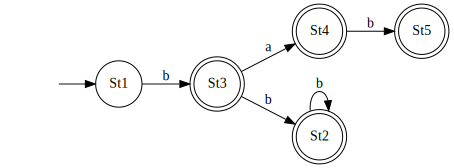

In [ ]:
dotObj_dfa(DFA1)

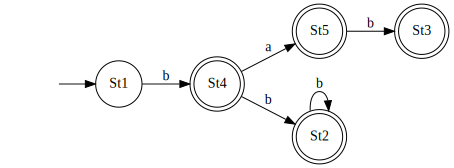

In [ ]:
dotObj_dfa(DFA2)

In [ ]:
CDFA1 = comp_dfa(DFA1)

In [ ]:
CDFA2 = comp_dfa(DFA2)

In [ ]:
DFA1_not2 = intersect_dfa(DFA1, CDFA2)

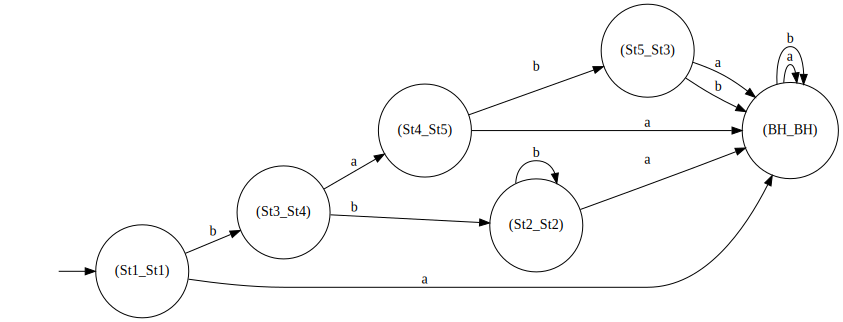

In [ ]:
dotObj_dfa(DFA1_not2)

# (8) Are there Strings in RE2 not in RE1?

In [ ]:
DFA2_not1 = intersect_dfa(DFA2, CDFA1)

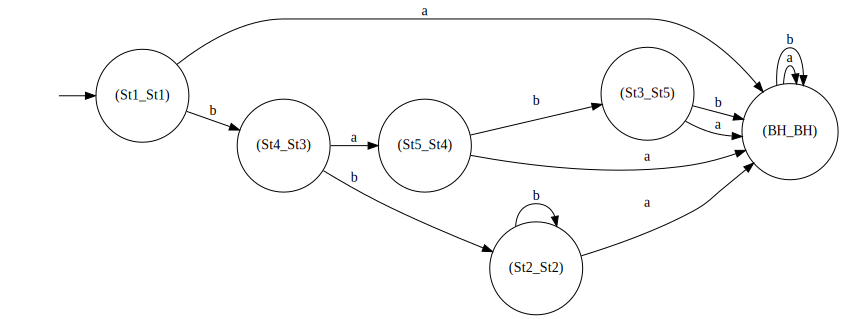

In [ ]:
dotObj_dfa(DFA2_not1)

## (9) Strings in RE2 not in RE1

*italicized text*# (9) Draw RE1 as an NFA

In [ ]:
N1 = re2nfa(RE1)

Generating LALR tables


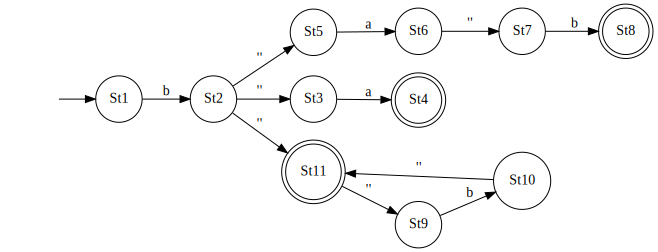

In [ ]:
dotObj_nfa(N1)